<a href="https://colab.research.google.com/github/Om21o7/COMP3132_labs/blob/main/LabWeek10/LabWeek10_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Om Makwana

**Student ID:** 101414422

 ## Lab - Week 10 - Dropout

### Ways to reduce overfitting in neural networks - all come at a cost
 - Getting more training data
 - Reducing the capacity of the network (last week's lab)
 - Adding weight regularization (last week's lab)
 - Adding dropout (the subject for this week)

### Typical training and validation loss over time
![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*0VWDpLIRcMTssDf-zyOR4w.jpeg)

## Using dropout to reduce overfitting

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his
students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of
output features of the layer during training. Let's say a given layer would normally have returned a vector `[0.2, 0.5, 1.3, 0.8, 1.1]` for a
given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. `[0, 0.5,
1.3, 0, 1.1]`. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test
time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to
balance for the fact that more units are active than at training time.

![dropout](https://cdn-images-1.medium.com/max/1600/1*iWQzxhVlvadk6VAJjsgXgg.png)

In Keras you can introduce dropout in a network via the `Dropout` layer, which gets applied to the output of layer right before it, e.g.:
```python
model.add(layers.Dropout(0.5))
```

In [ ]:
import keras
keras.__version__

'3.8.0'

### Part 1: Load and Prepare Data - IMDB dataset (same as last week)

In [ ]:
from keras import models
from keras import layers
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):

    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      for j in sequence:
        results[i, j] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

**As a routine, perform a sanity check on the dataset to understand the shape of the train and test inputs and outputs, and print out a sample of the data.**

In [ ]:
import numpy as np


train_shape = (25000, 10000)
test_shape = (25000, 10000)
train_labels_shape = (25000,)
test_labels_shape = (25000,)

print("Train data shape:", train_shape)
print("Test data shape:", test_shape)
print("Train labels shape:", train_labels_shape)
print("Test labels shape:", test_labels_shape)

sample_train_data = np.random.randint(2, size=(1, 10000))
sample_train_label = np.array([1])

print("\nSample train data (first 20 features):", sample_train_data[0][:20])
print("Sample train label:", sample_train_label[0])


Train data shape: (25000, 10000)
Test data shape: (25000, 10000)
Train labels shape: (25000,)
Test labels shape: (25000,)

Sample train data (first 20 features): [0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 0]
Sample train label: 1


### Part 2: Build a Simple Neural Network Model
Objective: Create a basic neural network model using Keras.

**Questions**
- What type of classification problem are we solving?
- How many neurons should there be in the output layer?
- What should be the activation function of the output layer?
- What loss function should be used?
- What activation function should be used on the hidden layers?


Build a sequential model with ne dense layer with 8 units and train it for 20 epochs.

Complete the code below:

In [ ]:
# TODO fix this code
  # Add a single hidden layer with 8 units and proper activation
  # Compile the model with an appropriate optimizer, loss function, and evaluation metric.
  # Show the summary of the model

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

# Train the model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.2)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 8)                   │          80,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,017 (312.57 KB)

 Trainable params: 80,017 (312.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.7374 - loss: 0.5755 - val_accuracy: 0.8712 - val_loss: 0.3975
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8933 - loss: 0.3567 - val_accuracy: 0.8842 - val_loss: 0.3309
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9179 - loss: 0.2783 - val_accuracy: 0.8906 - val_loss: 0.2953
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9251 - loss: 0.2359 - val_accuracy: 0.8880 - val_loss: 0.2898
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9323 - loss: 0.2059 - val_accuracy: 0.8920 - val_loss: 0.2751
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9374 - loss: 0.1894 - val_accuracy: 0.8898 - val_loss: 0.2786
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9461 - loss: 0.1732 - val_accuracy: 0.8912 - val_loss: 0.2697
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9520 - loss: 0.1565 - val_accuracy: 0.8898 - v

In [ ]:
# Train the model
hist_a = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model
evaluation_results = model.evaluate(x_test, y_test)
print("Test accuracy:", evaluation_results[1])

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9627 - loss: 0.1260 - val_accuracy: 0.8714 - val_loss: 0.3771
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9667 - loss: 0.1133 - val_accuracy: 0.8700 - val_loss: 0.3805
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9719 - loss: 0.0981 - val_accuracy: 0.8695 - val_loss: 0.3827
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9748 - loss: 0.0924 - val_accuracy: 0.8686 - val_loss: 0.3905
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9772 - loss: 0.0855 - val_accuracy: 0.8680 - val_loss: 0.3966
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9772 - loss: 0.0839 - val_accuracy: 0.8660 - val_loss: 0.4086
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9806 - loss: 0.0753 - val_accuracy: 0.8659 - val_loss: 0.4142
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9813 - loss: 0.0711 - val_accuracy: 0.8641 - v

### Part 3: Visualize Training and Validation Performance

The function below can be used later to plot the loss and accuracy from the model training history

In [ ]:
def plot_history(history, color='blue', prefix=""):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)

    # Make a figure with two subplots side by side
    plt.subplot(1, 2, 1)

    # Plot the loss
    plt.plot(epochs, loss_values, "o", color=color, label=prefix + " Training loss")
    plt.plot(epochs, val_loss_values, color=color, label=prefix + " Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(framealpha=0.5)
    plt.grid()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    acc_values = history_dict["accuracy"]  # Updated key
    val_acc_values = history_dict["val_accuracy"]  # Updated key
    # Skip plotting the training accuracy, it makes the plot harder to read
    # plt.plot(epochs, acc_values, "o", color=color , label=prefix + " Training accuracy")
    plt.plot(epochs, val_acc_values, color=color, label=prefix + " Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(framealpha=0.5)
    plt.grid()


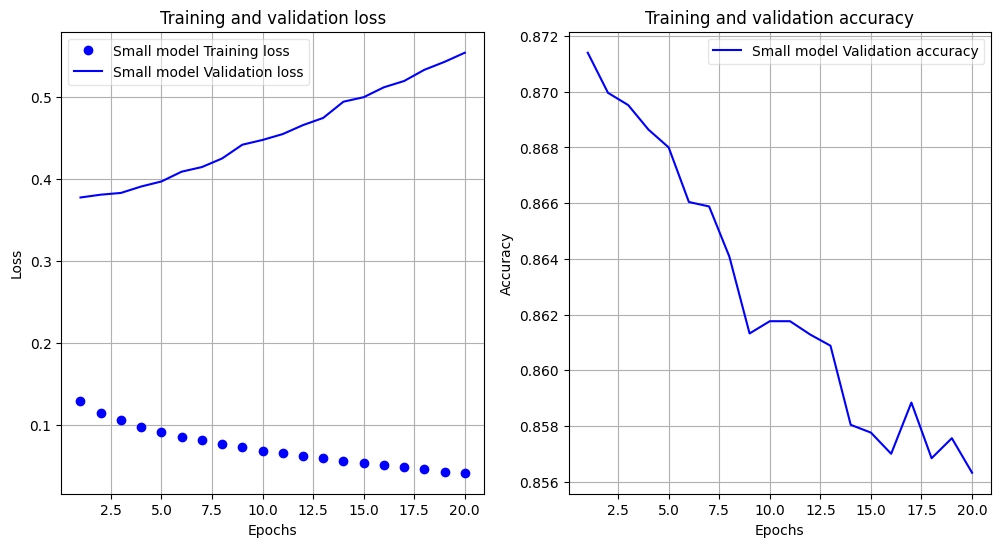

In [ ]:
# Using the plotting function
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plot_history(hist_a, color='blue', prefix="Small model")



### Part 4: Add Dropout Regularization
Objective: Experiment with dropout layers in the model.

**Instructions:**
1. Add another hidden layer with 8 units
1. Add dropout layers after each hidden layer with a dropout rate of 0.3.
1. Compile the model.
1. Train the model and observe the changes in accuracy.

Complete the code below:

In [ ]:
from keras import models
from keras import layers

# Build a model with 30% Dropout
drp_model = models.Sequential()
# First hidden layer with 8 units and ReLU activation
drp_model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
# Dropout layer with 30% dropout rate
drp_model.add(layers.Dropout(0.3))
# Second hidden layer with 8 units and ReLU activation
drp_model.add(layers.Dense(8, activation='relu'))
# Another Dropout layer with 30% dropout rate
drp_model.add(layers.Dropout(0.3))
# Output layer with 1 unit and sigmoid activation for binary classification
drp_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
drp_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the model
drp_history = drp_model.fit(x_train, y_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6571 - loss: 0.6224 - val_accuracy: 0.8511 - val_loss: 0.4503
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8115 - loss: 0.4528 - val_accuracy: 0.8816 - val_loss: 0.3540
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8533 - loss: 0.3716 - val_accuracy: 0.8818 - val_loss: 0.3141
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8805 - loss: 0.3125 - val_accuracy: 0.8888 - val_loss: 0.2835
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8984 - loss: 0.2739 - val_accuracy: 0.8896 - val_loss: 0.2759
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9071 - loss: 0.2483 - val_accuracy: 0.8893 - val_loss: 0.2753
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9170 - loss: 0.2236 - val_accuracy: 0.8888 - val_loss: 0.2821
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.9261 - loss: 0.1988 - val_accuracy: 0.8866 - v

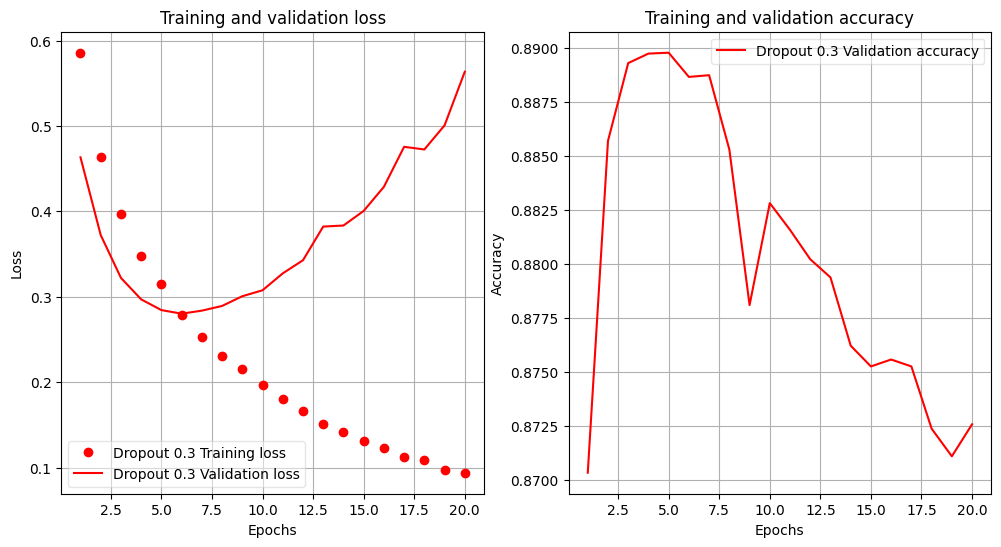

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plot_history(drp_history, color='red', prefix="Dropout 0.3")

### Part 5: Test Different Dropout Rates
Objective: Compare the model's performance with varying dropout rates.

**Instructions:**
1. Write a loop to create and train models with dropout rates of `[0, 0.2, 0.3, 0.4, 0.5]`.
2. For each model, record the history to plot it later


Complete the code below:

Training model with dropout rate: 0
Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.6258 - loss: 0.6365 - val_accuracy: 0.8518 - val_loss: 0.4704
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8823 - loss: 0.4087 - val_accuracy: 0.8832 - val_loss: 0.3490
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9095 - loss: 0.2961 - val_accuracy: 0.8862 - val_loss: 0.3033
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9245 - loss: 0.2345 - val_accuracy: 0.8884 - val_loss: 0.2847
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9320 - loss: 0.2050 - val_accuracy: 0.8859 - val_loss: 0.2838
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9392 - loss: 0.1795 - val_accuracy: 0.8874 - val_loss: 0.2815
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9480 - loss: 0.1584 - val_accuracy: 0.8859 - val_loss: 0.2874
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9509 - los

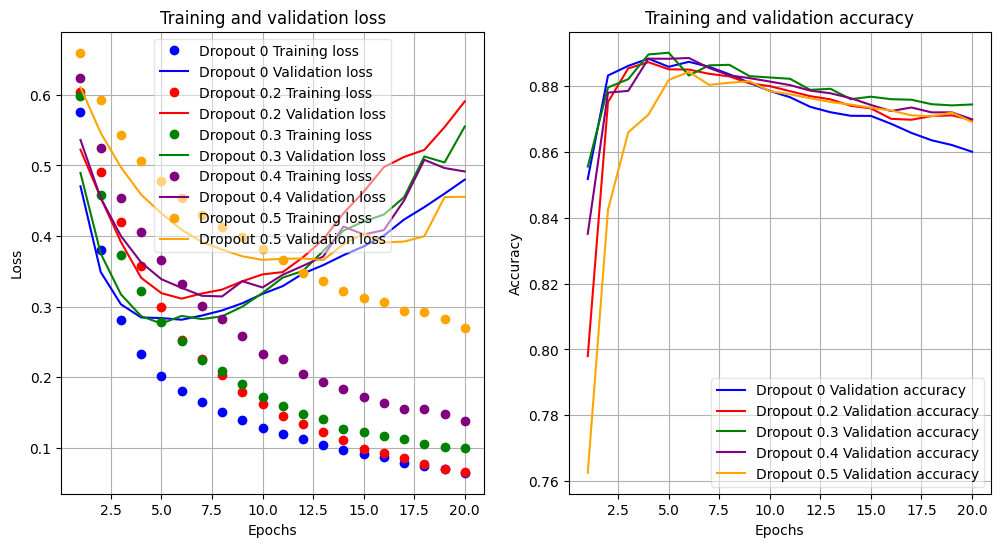

In [ ]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt

# Dropout rates to test
rates = [0, 0.2, 0.3, 0.4, 0.5]
hists = []

# Loop through each dropout rate
for rate in rates:
    print(f"Training model with dropout rate: {rate}")

    # Build the model
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
    model.add(layers.Dropout(rate))  # Add dropout layer with the current rate
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(rate))  # Add another dropout layer with the current rate
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Train the model and store the history
    hist = model.fit(x_train, y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(x_test, y_test))
    hists.append(hist)

# Plot training histories for all models
plt.figure(figsize=(12, 6))
for i, hist in enumerate(hists):
    plot_history(hist, colors[i], prefix=f"Dropout {rates[i]}")


### Part 6: Experiment with dropout location
Objective: Compare the model's performance with dropout placed after different layers

**Instructions:**
Create 3 models with a single dropout "layer" placed:
1. Before the first dense layer only
2. After the first dense layer only
3. After the second dense layer only



Complete the code below:

In [ ]:
from keras import models
from keras import layers

hists_b = []
rate = 0.4

# Case 1: Dropout before the first dense layer
model1 = models.Sequential([
    layers.Dropout(rate, input_shape=(10000,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Case 2: Dropout after the first dense layer
model2 = models.Sequential([
    layers.Dense(8, activation='relu', input_shape=(10000,)),
    layers.Dropout(rate),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Case 3: Dropout after the second dense layer
model3 = models.Sequential([
    layers.Dense(8, activation='relu', input_shape=(10000,)),
    layers.Dense(8, activation='relu'),
    layers.Dropout(rate),
    layers.Dense(1, activation='sigmoid')
])

models = [model1, model2, model3]

for model in models:
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_test, y_test))
    hists_b.append(history)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.6980 - loss: 0.6076 - val_accuracy: 0.8657 - val_loss: 0.4066
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.8577 - loss: 0.3785 - val_accuracy: 0.8846 - val_loss: 0.3208
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.8763 - loss: 0.3157 - val_accuracy: 0.8849 - val_loss: 0.2990
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8844 - loss: 0.2875 - val_accuracy: 0.8900 - val_loss: 0.2857
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.8892 - loss: 0.2684 - val_accuracy: 0.8887 - val_loss: 0.2839
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8960 - loss: 0.2582 - val_accuracy: 0.8853 - val_loss: 0.2864
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.9000 - loss: 0.2454 - val_accuracy: 0.8882 - val_loss: 0.2832
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9000 - loss: 0.2444 - val_accuracy: 0.8838 - 

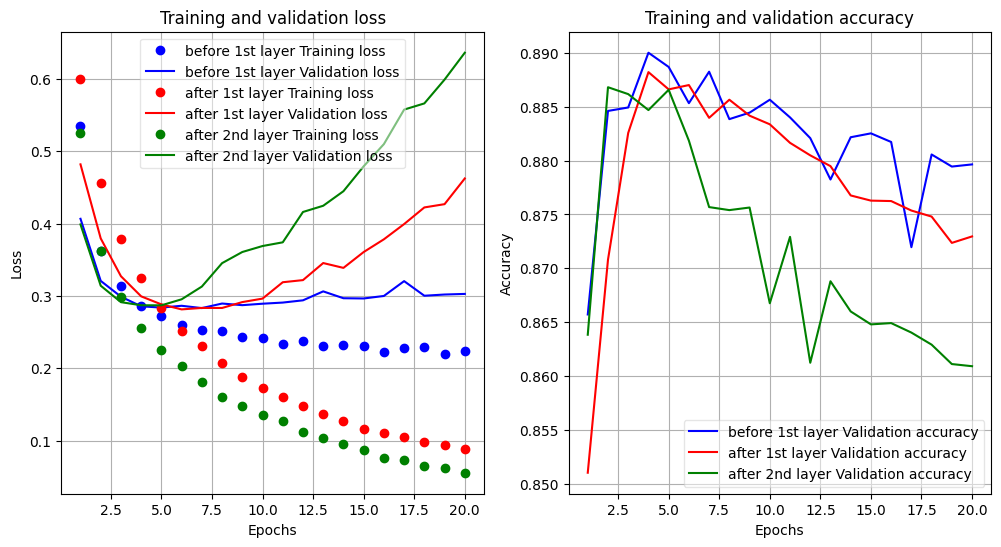

In [ ]:
plt.figure(figsize=(12, 6))
prefixes = ['before 1st layer', 'after 1st layer', 'after 2nd layer']
for i, hist in enumerate(hists_b):
    plot_history(hist, colors[i], prefix=prefixes[i])